<img src='riobackground.jpg'/>

# Airbnb in Rio de Janeiro - Exploratory Data Analysis and Data Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_listings.csv')

In [4]:
df.head()

,Unnamed: 0,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,...,wifi,tv,hot_water,kitchen,pets_allowed,free_parking,pool,bathroom_is_shared,bathrooms_type,price_range
0,0,f,t,Copacabana,-22.96599,-43.17940,Entire condominium (condo),Entire home/apt,5,1 bath,...,1,1,1,1,0,0,0,0,bath,\$251 - \$500
1,1,f,t,Ipanema,-22.98405,-43.20189,Entire rental unit,Entire home/apt,2,1 bath,...,1,1,1,0,0,0,0,0,bath,\$251 - \$500
2,2,f,t,Copacabana,-22.97735,-43.19105,Entire rental unit,Entire home/apt,2,1 bath,...,1,1,0,1,0,0,0,0,bath,\$100 - \$250
3,3,t,t,Ipanema,-22.98839,-43.19232,Entire rental unit,Entire home/apt,2,1.5 baths,...,1,1,1,1,0,0,0,0,bath,\$251 - \$500
4,4,t,t,Copacabana,-22.98107,-43.19136,Entire loft,Entire home/apt,2,1.5 baths,...,1,1,1,1,0,0,0,0,bath,\$100 - \$250


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,20850.0,-22.964696,0.035777,-23.07267,-22.984250,-22.970975,-22.948663,-22.74969
longitude,20850.0,-43.245414,0.096108,-43.69889,-43.281345,-43.194465,-43.185540,-43.10440
accommodates,20850.0,3.820671,2.137515,1.00000,2.000000,4.000000,5.000000,16.00000
bedrooms,20850.0,1.511655,0.859100,1.00000,1.000000,1.000000,2.000000,30.00000
beds,20850.0,2.369544,1.929120,0.00000,1.000000,2.000000,3.000000,50.00000
price,20850.0,332.415731,246.992169,33.00000,150.000000,250.000000,445.750000,1159.00000
minimum_nights,20850.0,4.986763,20.121915,1.00000,1.000000,2.000000,4.000000,1000.00000
maximum_nights,20850.0,618.332998,608.932472,1.00000,31.000000,888.000000,1125.000000,47036.00000
number_of_reviews,20850.0,15.788585,35.257100,0.00000,0.000000,2.000000,13.000000,494.00000
reviews_per_month,20850.0,0.476025,0.839481,0.00000,0.000000,0.110000,0.600000,24.35000


## Correlation

<AxesSubplot:>

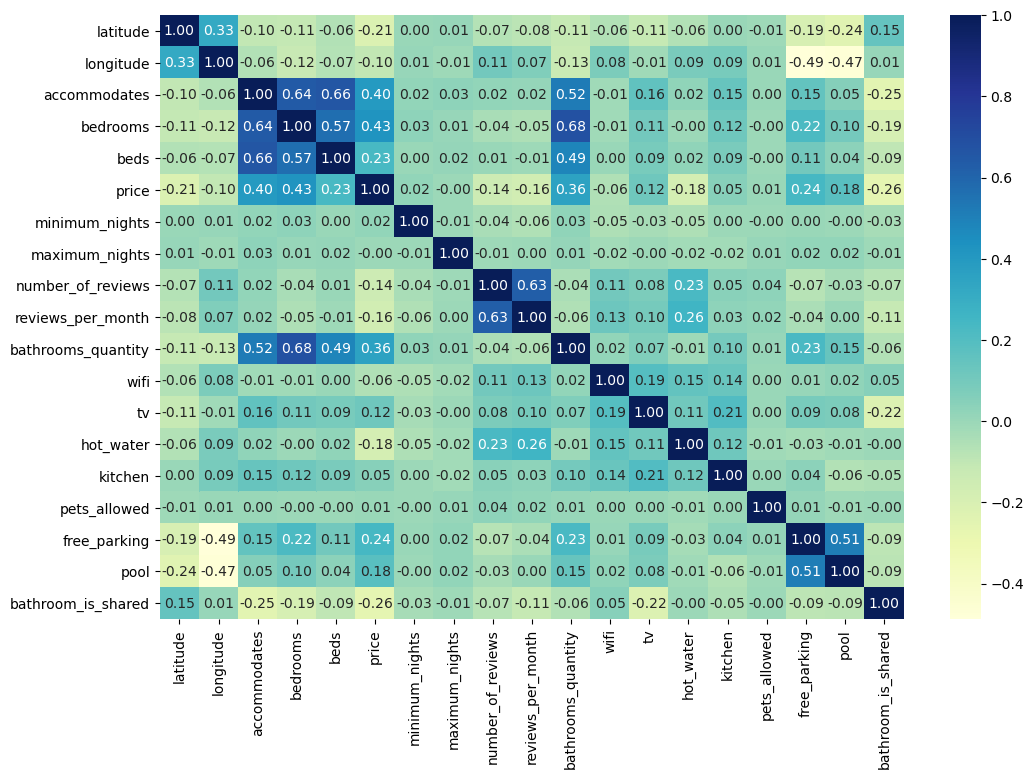

In [7]:
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

There is no relevant correlation between the price and the other features. The strongest correlation with the price is of 0.43 with the number of bedrooms that the Airbnb listing has, but it's a weak correlation.

## Price

Since the price will be the label for our model, let's take a look at it. The price column brings the information about the daily price of each Airbnb in local currency.

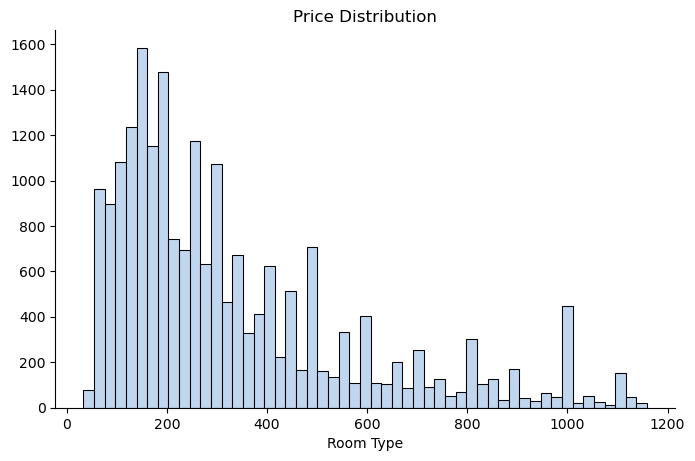

In [8]:
plt.figure(figsize=(8,5), dpi=100)
sns.histplot(data=df, x='price', color='#ABC9EA')
plt.xlabel('Room Type')
plt.ylabel('')
plt.title('Price Distribution')
sns.despine()

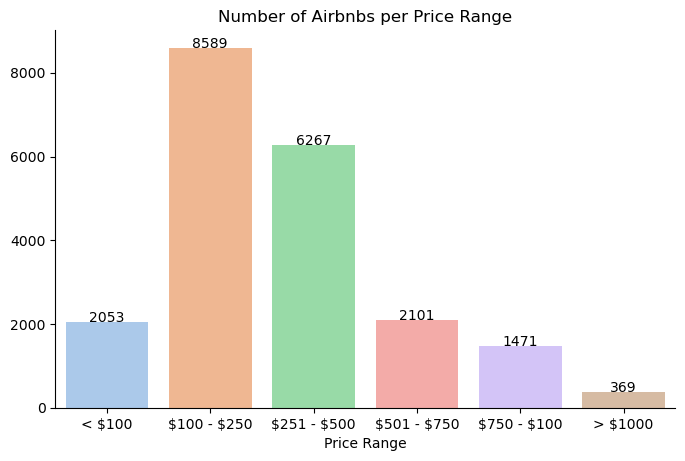

In [9]:
prince_range_order = ['< \$100', '\$100 - \$250', '\$251 - \$500', '\$501 - \$750',
                      '\$750 - \$100', '> \$1000']

countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='price_range', order=prince_range_order, palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)
plt.xlabel('Price Range')
plt.ylabel('')
plt.title('Number of Airbnbs per Price Range')
sns.despine()

In [10]:
per1 = len(df[df['price_range'] == '\$100 - \$250']) * 100 / len(df)
per2 = len(df[df['price_range'] == '\$251 - \$500']) * 100 / len(df)

print('$100 - $250 Percentage: {:.2f}%'.format(per1))
print('$251 - $500 Percentage: {:.2f}%'.format(per2))

$100 - $250 Percentage: 41.19%
$251 - $500 Percentage: 30.06%


The price distribution shows that most Airbnbs are concentrated in a price range between \\$100.00 and \\$500.00 per night. With the grouping of price ranges we can observe this in more detail. 8589 Airbnbs are priced between \\$100 - \\$250 and 6267 are priced between \\$251 - \\$500, representing respectively, 41.19% and 30.06% of the total data. 

## Rooms

There are four types of accommodations on Airbnb. The [Airbnb site](https://www.airbnb.com/help/article/5/what-does-the-room-type-of-a-listing-mean) describes each type:

  - **Entire home/apt:** Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance.
  - **Private room:** Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your own private room for sleeping and may share some spaces with others. 
  - **Shared room:** Shared rooms are for when you don't mind sharing a space with others. when you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people.
  - **Hotel room:** Hotel rooms, private or shared, offer the level of service and hospitality associated with traditional hotels. Rooms are available at boutique or lifestyle hotels, hostels, inns and similar properties. In general, there are livelier common areas and the rooms have a unique style.

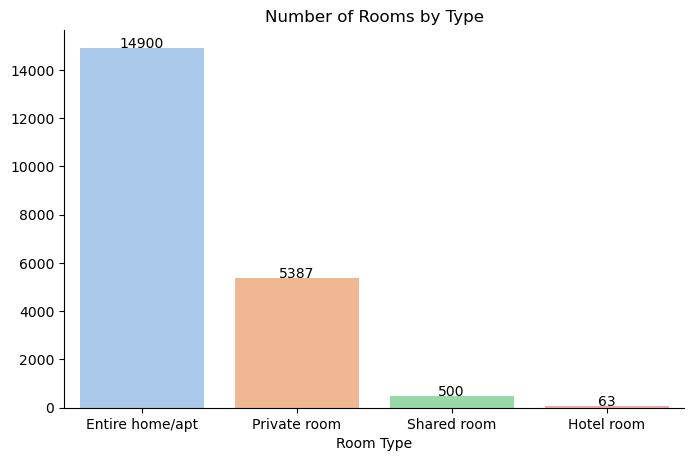

In [11]:
countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='room_type', palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)
plt.xlabel('Room Type')
plt.ylabel('')
plt.title('Number of Rooms by Type')
sns.despine()

In [12]:
perc_room = len(df[df['room_type'] == 'Entire home/apt']) * 100 / len(df)

print('Entire home/apt percentage: {:.2f}%'.format(perc_room))

Entire home/apt percentage: 71.46%


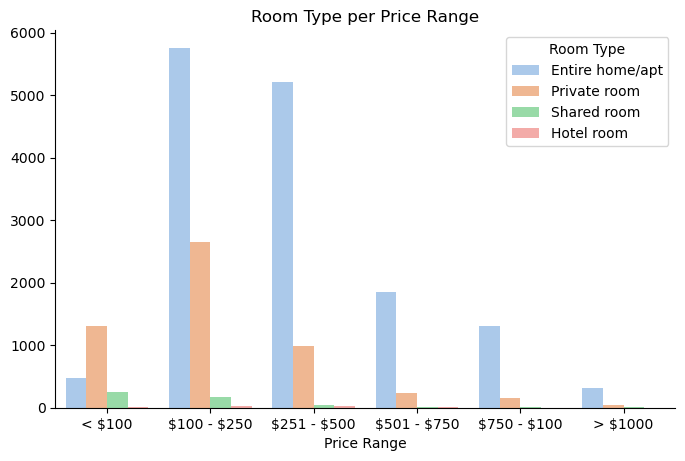

In [13]:
prince_range_order = ['< \$100', '\$100 - \$250', '\$251 - \$500', '\$501 - \$750',
                      '\$750 - \$100', '> \$1000']

plt.figure(figsize=(8,5), dpi=100)
sns.countplot(data=df, x='price_range', order=prince_range_order, hue='room_type',
              palette='pastel')
plt.xlabel('Price Range')
plt.ylabel('')
plt.title('Room Type per Price Range')
plt.legend(title='Room Type')
sns.despine()

The overwhelming majority of Airbnbs in Rio de Janeiro are entire home/apt, representing 71.46% of the data. An interesting thing to note is that Airbnbs that cost less than $100.00 are mostly private rooms.

In the table below, you can see the average price per day of each type of room. The most expensive average is for an entire home/apt, with a mean of \\$377.00 per day. And the cheapest avarege is shared rooms, with a mean of \\$173.00 per day.

In [80]:
room_type_avg_price = df.groupby("room_type").mean()["price"]
room_type_count = df["room_type"].value_counts()

room_statistics = pd.merge(room_type_count, room_type_avg_price, 
                                how="inner", left_index=True, right_index=True)
room_statistics.columns = ["count", "avg_price"]
room_statistics.sort_values(by="count", ascending=False)

,count,avg_price
Entire home/apt,14900,377.081946
Private room,5387,224.415259
Shared room,500,173.630000
Hotel room,63,263.603175


## Amenities

Amenities are items one expects to have in a comfortable stay. In airbnb listings, the host itself informs what amenities their accommodation has. However, the lack of information about an amenity doesn't necessarily mean that that Airbnb doesn't have it. It may be that the host just did not inform.

**Is there Wifi?**

The overwhelming majority of listings say that there is wifi. More than 90% bring this information.

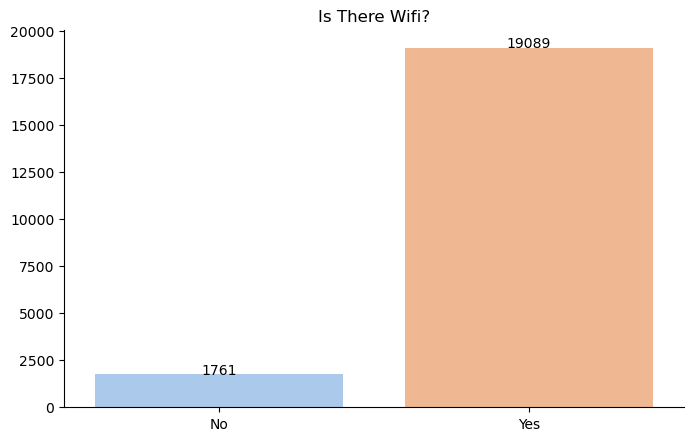

In [14]:
countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='wifi', palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)
plt.xlabel('')
plt.ylabel('')
plt.title('Is There Wifi?')
plt.xticks([0, 1], ['No','Yes'])
sns.despine()

In [15]:
perc = len(df[df['wifi'] == 1]) * 100 / len(df)

print('"There is wifi" Percentage: {:.2f}%'.format(perc))

"There is wifi" Percentage: 91.55%


**Is there Tv?**

Most listings say that there is tv. About 87% bring this information.

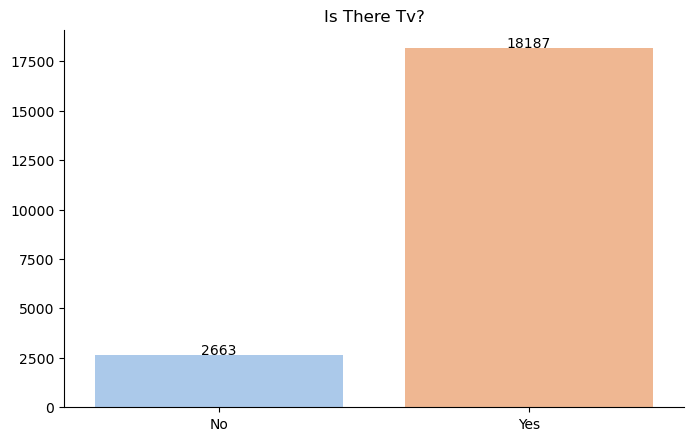

In [16]:
countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='tv', palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)
plt.xlabel('')
plt.ylabel('')
plt.title('Is There Tv?')
plt.xticks([0, 1], ['No','Yes'])
sns.despine()

In [17]:
perc = len(df[df['tv'] == 1]) * 100 / len(df)

print('"There is tv" Percentage: {:.2f}%'.format(perc))

"There is tv" Percentage: 87.23%


**Is there hot water?**

Just over 62% of Airbnbs provide information about having hot water.

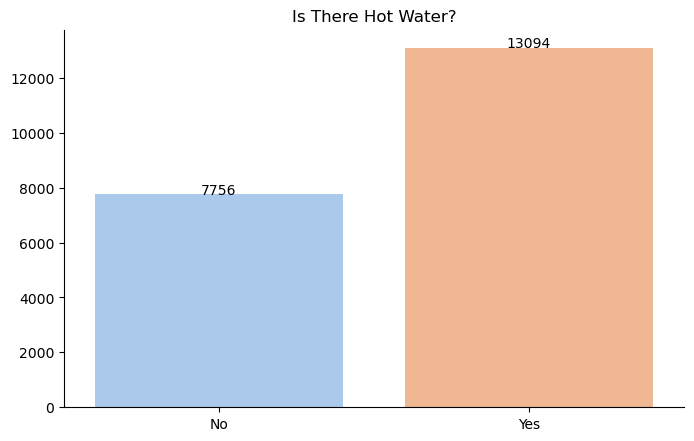

In [18]:
countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='hot_water', palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)
plt.xlabel('')
plt.ylabel('')
plt.title('Is There Hot Water?')
plt.xticks([0, 1], ['No','Yes'])
sns.despine()

In [19]:
perc = len(df[df['hot_water'] == 1]) * 100 / len(df)

print('"There is hot water" Percentage: {:.2f}%'.format(perc))

"There is hot water" Percentage: 62.80%


**Is there any kitchen?**

The overwhelming majority of listings say that there is kitchen. Just over 91% of airbnbs provide information about having a kitchen.

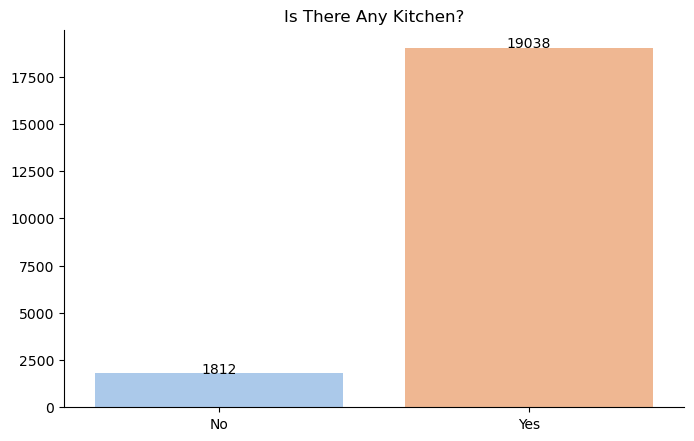

In [20]:
countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='kitchen', palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)
plt.xlabel('')
plt.ylabel('')
plt.title('Is There Any Kitchen?')
plt.xticks([0, 1], ['No','Yes'])
sns.despine()

In [21]:
perc = len(df[df['kitchen'] == 1]) * 100 / len(df)

print('"There is kitchen" Percentage: {:.2f}%'.format(perc))

"There is kitchen" Percentage: 91.31%


**Pets Are Allowed?**

Only 0.01% of the listings bring this information. (Only 2 Airbnbs!!). Since it's such a small percentage, this feature can be dropped for the machine learning modeling.

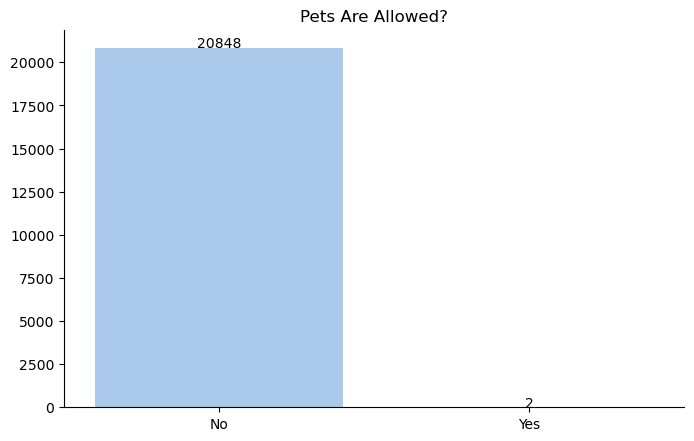

In [22]:
countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='pets_allowed', palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)

plt.xlabel('')
plt.ylabel('')
plt.title('Pets Are Allowed?')
plt.xticks([0, 1], ['No','Yes'])
sns.despine()

In [23]:
perc = len(df[df['pets_allowed'] == 1]) * 100 / len(df)

print('"Are pets allowed" Percentage: {:.2f}%'.format(perc))

"Are pets allowed" Percentage: 0.01%


**Is there free parking?**

About 34% of the listings bring information about having free parking.

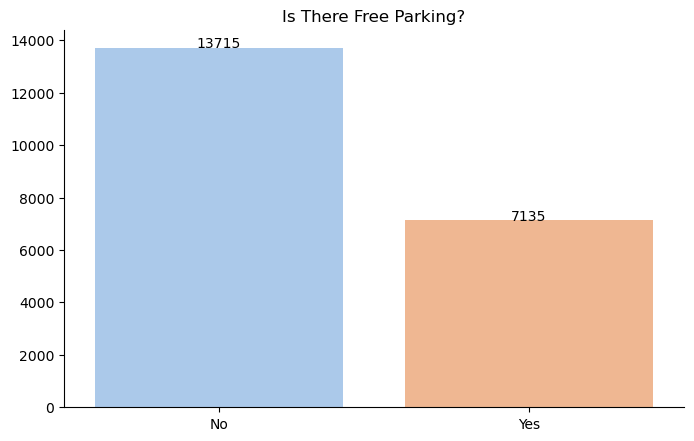

In [24]:
countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='free_parking', palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)

plt.xlabel('')
plt.ylabel('')
plt.title('Is There Free Parking?')
plt.xticks([0, 1], ['No','Yes'])
sns.despine()

In [25]:
perc = len(df[df['free_parking'] == 1]) * 100 / len(df)

print('"Free Parking" Percentage: {:.2f}%'.format(perc))

"Free Parking" Percentage: 34.22%


**Is there any pool?**

About 23% of the listings bring information about having pool.

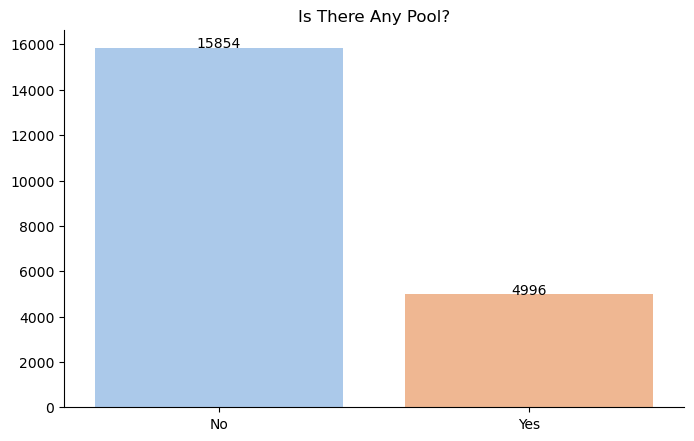

In [26]:
countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='pool', palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)

plt.xlabel('')
plt.ylabel('')
plt.title('Is There Any Pool?')
plt.xticks([0, 1], ['No','Yes'])
sns.despine()

In [27]:
perc = len(df[df['pool'] == 1]) * 100 / len(df)

print('"There is pool" Percentage: {:.2f}%'.format(perc))

"There is pool" Percentage: 23.96%


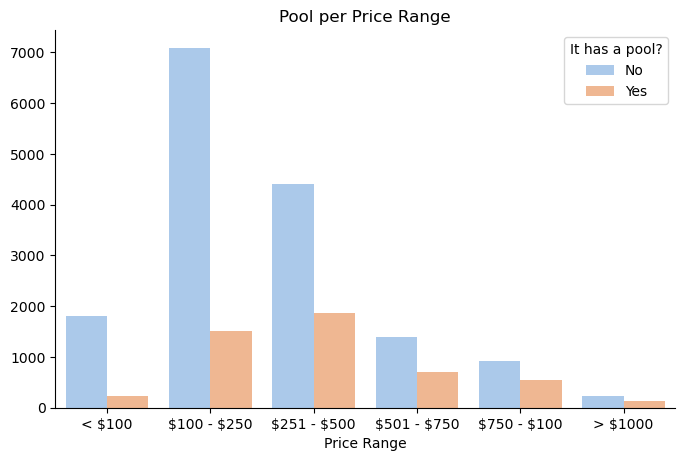

In [67]:
price_range_order = ['< \$100', '\$100 - \$250', '\$251 - \$500', '\$501 - \$750',
                      '\$750 - \$100', '> \$1000']

plt.figure(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='price_range', palette='pastel', hue='pool', 
              order=price_range_order)
plt.xlabel('Price Range')
plt.ylabel('')
plt.title('Pool per Price Range')
plt.legend(['No','Yes'], title='It has a pool?')
sns.despine()

## And about bathrooms?

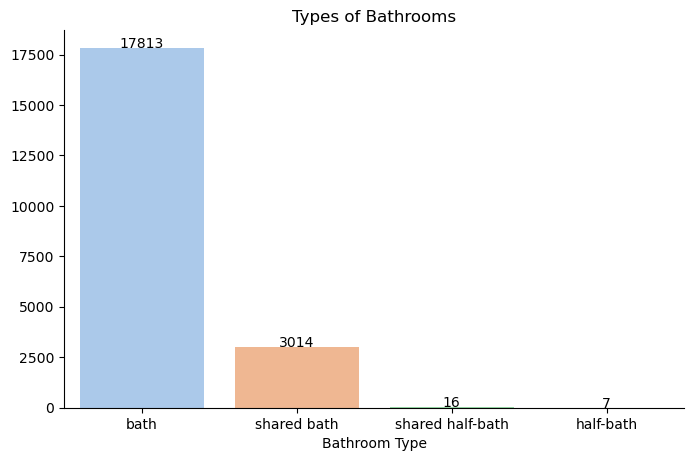

In [34]:
countplt, ax = plt.subplots(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='bathrooms_type', palette='pastel')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,
             rect.get_height()+ 0.75, rect.get_height(),
             horizontalalignment='center', fontsize = 10)
plt.xlabel('Bathroom Type')
plt.ylabel('')
plt.title('Types of Bathrooms')
sns.despine()

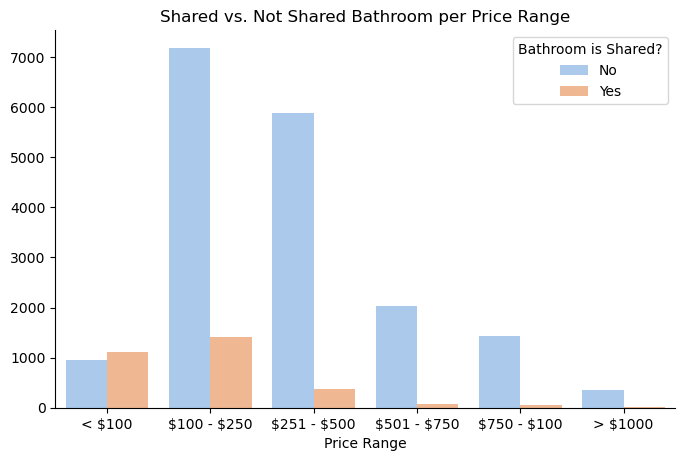

In [66]:
price_range_order = ['< \$100', '\$100 - \$250', '\$251 - \$500', '\$501 - \$750',
                      '\$750 - \$100', '> \$1000']

plt.figure(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='price_range', palette='pastel', hue='bathroom_is_shared', 
              order=price_range_order)
plt.xlabel('Price Range')
plt.ylabel('')
plt.title('Shared vs. Not Shared Bathroom per Price Range')
plt.legend(['No','Yes'], title='Bathroom is Shared?')
sns.despine()

## Neighbourhood

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

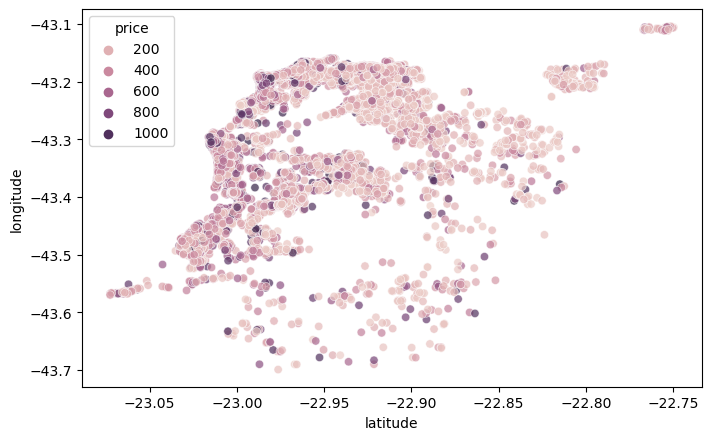

In [95]:
plt.figure(figsize = (8,5), dpi=100)
sns.scatterplot(data=df, x='latitude', y='longitude', hue='price', alpha=0.7)

**What are the 10 neighbourhoods with more Aibnbs in Rio?**

In [54]:
df_ten_neighbourhood = df.groupby(by=['neighbourhood_cleansed']).count().sort_values(by='latitude', ascending=False)[:10]

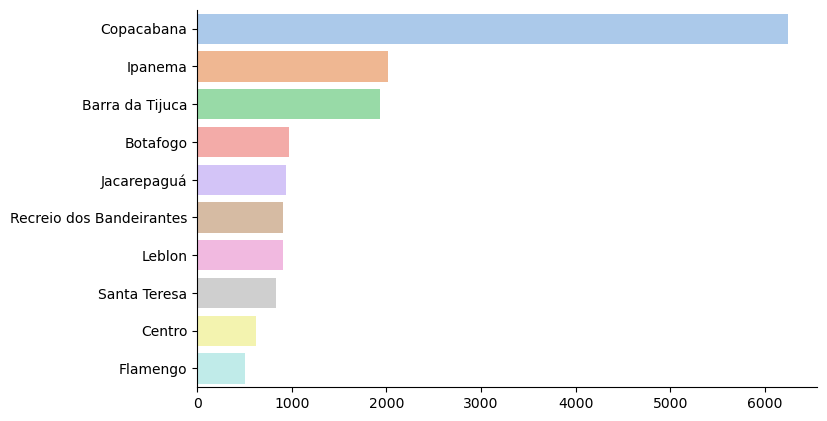

In [62]:
plt.figure(figsize = (8,5), dpi=100)
sns.barplot(data=df_ten_neighbourhood, y=df_ten_neighbourhood.index, x='host_is_superhost',
            palette='pastel')
plt.xlabel('')
plt.ylabel('')
sns.despine()

**Which neighbourhoods have the most expensive Airbnbs in Rio?**

In [68]:
df.groupby(by=['neighbourhood_cleansed']).mean().sort_values(by='price', ascending=False)[:10]

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,bathrooms_quantity,wifi,tv,hot_water,kitchen,pets_allowed,free_parking,pool,bathroom_is_shared
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,
Rocha Miranda,-22.850160,-43.346770,6.000000,2.000000,1.000000,661.500000,4.000000,577.500000,0.000000,0.000000,2.750000,0.000000,0.500000,0.500000,1.000000,0.0,0.500000,0.000000,0.000000
Grumari,-23.052120,-43.537723,7.666667,2.666667,4.333333,591.333333,2.333333,871.666667,33.000000,1.153333,2.000000,1.000000,0.666667,1.000000,1.000000,0.0,1.000000,0.333333,0.000000
Complexo do Alemão,-22.859155,-43.274705,2.500000,1.500000,2.000000,550.000000,2.000000,16.500000,3.500000,0.065000,1.250000,0.500000,0.500000,0.500000,1.000000,0.0,0.000000,0.000000,0.500000
Manguinhos,-22.883065,-43.245100,6.000000,1.500000,2.500000,543.000000,1.000000,567.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.0,1.000000,0.500000,0.000000
Gardênia Azul,-22.958301,-43.350852,4.227273,1.772727,2.500000,511.727273,2.954545,678.272727,2.136364,0.065000,1.363636,0.636364,0.909091,0.272727,0.909091,0.0,0.681818,0.227273,0.090909
Pavuna,-22.815883,-43.376180,6.250000,2.000000,2.250000,507.500000,9.250000,655.250000,0.000000,0.000000,1.125000,0.250000,0.750000,0.250000,0.750000,0.0,0.500000,0.000000,0.000000
Barros Filho,-22.831210,-43.372600,4.000000,1.000000,1.000000,500.000000,1.000000,1125.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000
Alto da Boa Vista,-22.964707,-43.261131,4.142857,1.809524,2.761905,465.523810,2.619048,431.428571,13.095238,0.749048,1.642857,0.904762,0.761905,0.476190,1.000000,0.0,0.666667,0.476190,0.142857
Leblon,-22.983418,-43.222993,3.982301,1.681416,2.461283,456.158186,5.713496,593.008850,22.303097,0.637533,1.605642,0.963496,0.942478,0.716814,0.959071,0.0,0.381637,0.209071,0.073009


**Which neighborhoods have the cheapest Airbnbs in Rio?**

In [74]:
df.groupby(by=['neighbourhood_cleansed']).mean().sort_values(by='price')[:10]

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,bathrooms_quantity,wifi,tv,hot_water,kitchen,pets_allowed,free_parking,pool,bathroom_is_shared
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,
Vista Alegre,-22.828240,-43.319190,4.000000,1.000000,4.000000,60.000000,7.00,1125.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.0,0.0,1.000000,0.000000,1.000000
Ramos,-22.854710,-43.254800,1.600000,1.000000,1.000000,61.000000,3.00,483.400000,23.600000,0.410000,1.300000,1.0,1.000000,0.400000,1.0,0.0,0.400000,0.000000,0.600000
Mangueira,-22.907630,-43.234705,4.666667,1.333333,4.000000,63.333333,1.00,503.833333,0.166667,0.093333,1.416667,1.0,0.833333,0.500000,1.0,0.0,0.500000,0.000000,0.833333
Senador Camará,-22.882205,-43.486202,2.000000,1.000000,1.250000,70.000000,1.25,20.000000,3.000000,0.285000,1.000000,1.0,1.000000,1.000000,1.0,0.0,1.000000,0.500000,0.250000
Honório Gurgel,-22.850413,-43.356910,3.333333,1.666667,2.333333,71.333333,1.00,760.000000,35.000000,2.176667,1.000000,1.0,1.000000,1.000000,1.0,0.0,0.666667,0.000000,0.333333
Vila Kosmos,-22.854710,-43.306165,1.500000,1.000000,1.500000,74.500000,1.50,564.000000,0.000000,0.000000,1.000000,1.0,0.500000,0.500000,0.5,0.0,0.500000,0.000000,1.000000
Jacarezinho,-22.893270,-43.262930,2.000000,2.000000,2.000000,75.000000,7.00,30.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.0,0.0,0.000000,0.000000,1.000000
Vicente de Carvalho,-22.851460,-43.314525,2.000000,1.500000,2.000000,81.500000,63.00,1122.500000,2.500000,0.700000,1.000000,0.5,0.500000,1.000000,0.5,0.0,0.500000,0.000000,0.500000
Deodoro,-22.836620,-43.381520,1.000000,1.000000,1.000000,84.000000,1.00,1125.000000,7.000000,0.720000,1.000000,1.0,1.000000,1.000000,1.0,0.0,0.000000,0.000000,0.000000


## Hosts

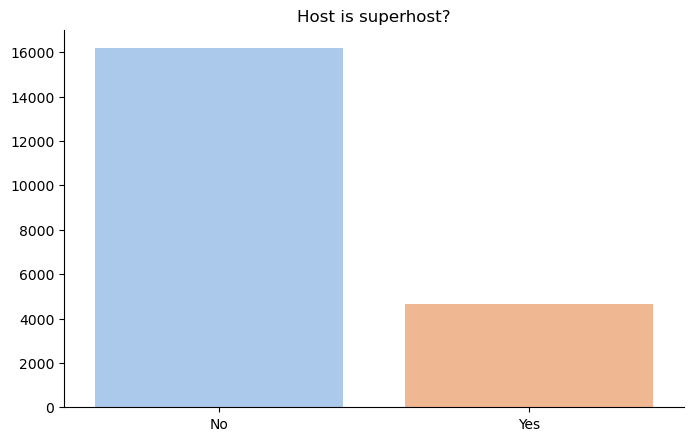

In [98]:
plt.figure(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='host_is_superhost', palette='pastel')
plt.xlabel('')
plt.ylabel('')
plt.title('Host is superhost?')
plt.xticks([0, 1], ['No','Yes'])
sns.despine()

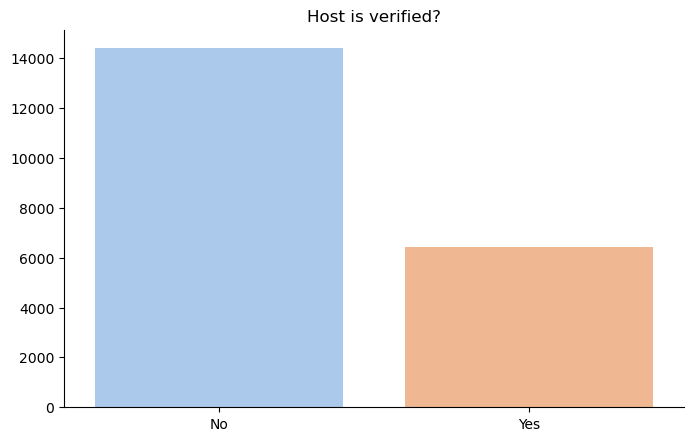

In [102]:
plt.figure(figsize = (8,5), dpi=100)
sns.countplot(data=df, x='host_identity_verified', palette='pastel')
plt.xlabel('')
plt.ylabel('')
plt.title('Host is verified?')
plt.xticks([0, 1], ['No','Yes'])
sns.despine()